In [35]:
import numpy as np
correlations = np.load("./correlations.pkl.npy")
check = np.load("./check.pkl.npy")

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

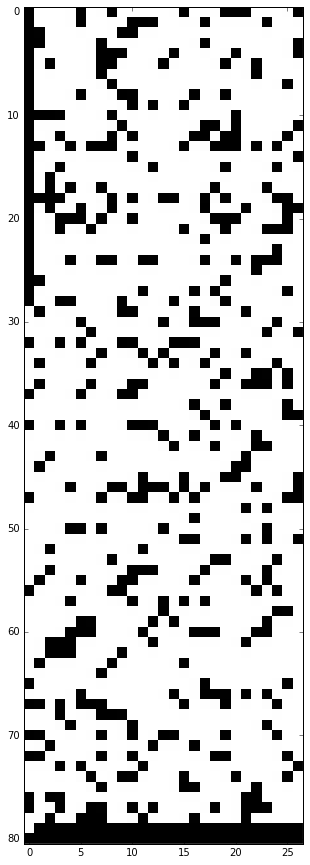

In [37]:
# GPU correlations (symptomatic that the first diagonals (8-blocks) are 0 (== black) always
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(correlations, cmap="gray", interpolation="none")

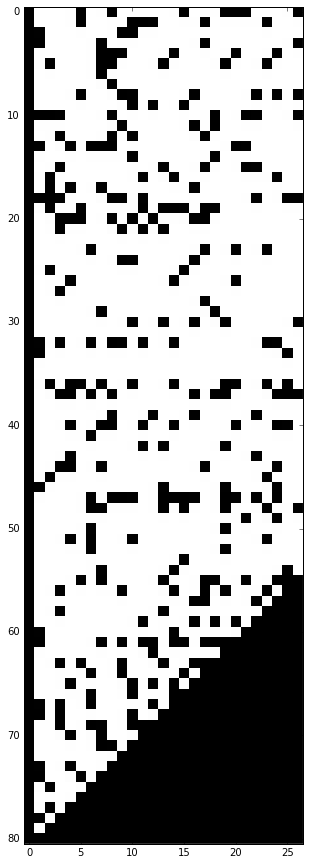

In [38]:
# Ground truth (seems wrong...diagonal not white == 1)
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(check, cmap="gray", interpolation="none")

In [39]:
check.shape

(81, 27)

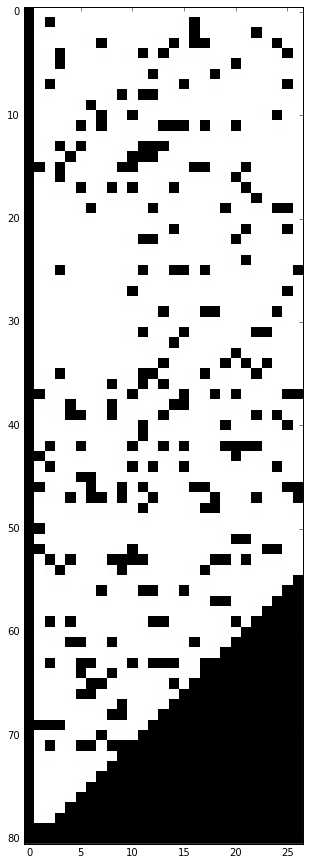

In [44]:
# let's do it again, recalculate ground truth 
# 54 is the last row where there is a "full==27" sliding window to check in the future (54+27=81). 
# That's why there is black triangle at the bottom. In a continuous sliding window, this wouldn't be there
# This is with N=81, sliding window = 27. Block_size=9 (3x3)
x = np.load("./x.pkl.npy")
y = np.load("./y.pkl.npy")
z = np.load("./z.pkl.npy")
ct = np.load("./ct.pkl.npy")
check1 = np.zeros_like(correlations)
sliding_window = check1.shape[1]
for i in range(check1.shape[0]):
    for j in range(i , min(sliding_window + i, check1.shape[0])):
            if (ct[i]-ct[j])**2 < (x[i]-x[j])**2  + (y[i] - y[j])**2 + (z[i] - z[j])**2:
                check1[i, j-i] = 1
                
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(check1, cmap="gray", interpolation="none")

In [42]:
N = check.shape[0]
np.abs(check - check1).max()

0

In [45]:
x

array([  2.62125134e-01,   1.66247472e-01,   7.46987820e-01,
         8.44494849e-02,   1.49974659e-01,   9.18060660e-01,
         7.12372601e-01,   2.89005670e-03,   5.40305257e-01,
         1.85513520e-04,   1.75344706e-01,   7.18478978e-01,
         9.68446910e-01,   6.82342231e-01,   7.42833555e-01,
         3.90967876e-01,   3.97677749e-01,   3.66953731e-01,
         9.09843504e-01,   5.86655498e-01,   2.34058380e-01,
         3.65003087e-02,   3.15229088e-01,   8.20108280e-02,
         6.73071623e-01,   7.83013821e-01,   8.21596384e-01,
         2.10038677e-01,   9.84087527e-01,   2.00123176e-01,
         6.93955719e-01,   4.53183889e-01,   1.59402430e-01,
         2.86394179e-01,   2.51478463e-01,   3.46365459e-02,
         4.82546955e-01,   2.65340172e-02,   9.51423347e-02,
         5.82702756e-01,   6.96072042e-01,   9.85243693e-02,
         2.68605322e-01,   5.53081632e-01,   5.39106727e-01,
         7.14202762e-01,   6.14814870e-02,   3.32345575e-01,
         9.16857183e-01,

In [46]:
y

array([  9.57210243e-01,   5.96033260e-02,   9.26671922e-01,
         7.19550475e-02,   4.43731070e-01,   1.72075555e-01,
         8.09337258e-01,   6.73607469e-01,   1.54924951e-02,
         4.94233161e-01,   5.24073467e-02,   7.39594102e-01,
         3.88848841e-01,   8.12519848e-01,   9.52368855e-01,
         8.99817407e-01,   7.42546260e-01,   2.05714747e-01,
         7.98443437e-01,   5.43037295e-01,   5.08287400e-02,
         3.65579009e-01,   1.67290851e-01,   5.05909562e-01,
         9.62084174e-01,   5.94800413e-01,   9.46983635e-01,
         2.23795056e-01,   4.77088779e-01,   4.75770682e-01,
         1.58348866e-02,   4.58839774e-01,   8.46603274e-01,
         2.82071769e-01,   1.42846480e-01,   4.53506619e-01,
         7.51456916e-01,   1.43910840e-01,   4.84819710e-01,
         4.30937529e-01,   6.26538575e-01,   6.84943676e-01,
         3.66235286e-01,   7.29802847e-01,   6.01419210e-01,
         9.65926588e-01,   4.56704021e-01,   4.77154523e-01,
         3.60362291e-01,

In [47]:
import numpy as np
np.where(x==0.82403624)

(array([], dtype=int64),)

In [113]:
np.where(x==0.81775689)

(array([8]),)

In [114]:
y[8:16]

array([ 0.49462005,  0.13737926,  0.63217103,  0.88951969,  0.95967758,
        0.93269199,  0.01922691,  0.11102214], dtype=float32)

In [84]:
y[24:]

array([ 0.86980486,  0.95739377,  0.45722562,  0.24933068,  0.79062432,
        0.41660839,  0.2160219 ,  0.20491999,  0.89854044,  0.18462023,
        0.29852843,  0.35963443,  0.6159724 ,  0.72406787,  0.88663906,
        0.8957932 ,  0.95089775,  0.81628722,  0.38464957,  0.09199598,
        0.84929907,  0.89802736,  0.47384384,  0.32334676,  0.68980533,
        0.55929697,  0.85717803,  0.43673065,  0.53199059,  0.61012739,
        0.35549074,  0.21740046,  0.72848731,  0.23121756,  0.0925628 ,
        0.69927949,  0.2881934 ,  0.51331192,  0.0060772 ,  0.86945933], dtype=float32)

In [85]:
z[24:]

array([ 0.19824067,  0.71382284,  0.06260016,  0.73668307,  0.11869724,
        0.11193934,  0.72747481,  0.46255267,  0.81613207,  0.77432835,
        0.20919167,  0.93272632,  0.14098145,  0.77419633,  0.80323517,
        0.90561998,  0.7683695 ,  0.97668117,  0.78336018,  0.56513208,
        0.13854954,  0.80031669,  0.46786216,  0.97926974,  0.51297593,
        0.30397162,  0.32215321,  0.13564816,  0.71447772,  0.33202007,
        0.29784349,  0.80185348,  0.31685761,  0.11355828,  0.39447027,
        0.69777393,  0.06081379,  0.44030124,  0.90970933,  0.02768658], dtype=float32)

In [138]:
y.shape

(81,)

In [139]:
ct.shape

(81,)